In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16535011208611999448
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5824233895261748497
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


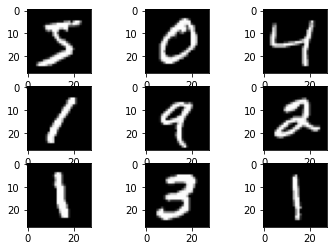

In [24]:
# Lets look how MNIST data looks

# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

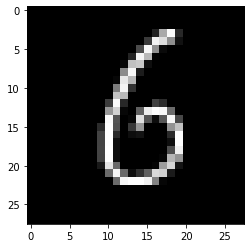

In [25]:
pyplot.imshow(trainX[18], cmap=pyplot.get_cmap('gray'))

In [15]:
import numpy as np
import warnings

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.optimizers import SGD

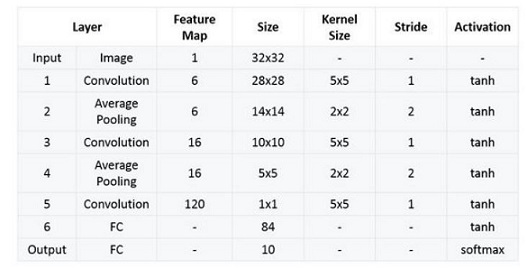

In [16]:
import tensorflow as tf

def LeNet(input_tensor=None,classes=2):   
  model = Sequential()

 # Building the Model Architecture
  model = Sequential()

  # Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. 
  # The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
  # That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
  # Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
  model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1))) #C1

  # The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
  # The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, 
  # so the output matrix size of this layer is 14 * 14 * 6.
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  # The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. 
  # This layer does not use all 0 padding, and the step size is 1.
  # The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
  model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))

  # The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and 
  # the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, 
  # but because the size of the filter is 5 * 5, #
  # So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, 
  # then this layer is the same as the fully connected layer.
  # The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
  model.add(Flatten())
  model.add(Dense(120, activation='tanh')) # 

  # The number of input nodes in this layer is 120 and the number of output nodes is 84. 
  # The total parameter is 120 * 84 + 84 = 10164 (w + b)
  model.add(Dense(84, activation='tanh')) #F6

  # The number of input nodes in this layer is 84 and the number of output nodes is 10. 
  # The total parameter is 84 * 10 + 10 = 850
  model.add(Dense(classes, activation='softmax'))  # Output Layer

  return model

In [17]:
tf.__version__

'2.7.0'

In [18]:
model = LeNet(classes = 10) # Mnist Data # predict digits 0-9

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [20]:
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 34s 8ms/step - loss: 0.3926 - accuracy: 0.8855 - val_loss: 0.1311 - val_accuracy: 0.9605
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.1133 - accuracy: 0.9666 - val_loss: 0.0834 - val_accuracy: 0.9743


In [21]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9743
Test Loss: 0.0834052637219429
Test accuracy: 0.9743000268936157


In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = x_test[5]
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img / 255.0

model.predict(img)

array([[3.2910194e-02, 6.9501823e-01, 4.5908816e-04, 1.8978446e-05,
        1.6285002e-01, 2.2657779e-03, 5.5547975e-02, 4.7961615e-02,
        2.9748274e-04, 2.6706110e-03]], dtype=float32)

In [22]:
model.predict(x_train[0].reshape(1,28,28,1))

array([[2.1252055e-05, 1.0818313e-04, 2.3096294e-05, 4.2955030e-02,
        7.8662646e-07, 9.5624918e-01, 2.4830228e-05, 2.2021274e-04,
        2.7688750e-04, 1.2047909e-04]], dtype=float32)

In [23]:
import numpy as np
np.argmax(model.predict(img))

1